#1. Importing Data

In [ ]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('/content/corporate_stress_dataset.csv')  # Replace with your file path


#2. Cleaning the Data

In [ ]:
# Display basic info
print(data.info())

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values
# OR fill missing values
data.fillna({'Stress Level': 0, 'Manager Support': 'Unknown'}, inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  object 
 12  Comp

#3. Selection and Indexing

In [ ]:
# Clean column names: lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Select specific columns
selected_columns = data[['age', 'gender', 'stress_level']]
print("Selected Columns:")
print(selected_columns)

# Select rows using condition (e.g., stress level greater than 7)
high_stress = data[data['stress_level'] > 7]
print("\nRows with Stress Level > 7:")
print(high_stress)

# Select rows by index (e.g., rows 10 to 20)
row_selection = data.iloc[10:20]
print("\nRows 10 to 20:")
print(row_selection)


Selected Columns:
       age      gender  stress_level
2       32      Female             7
3       60      Female             6
4       25        Male             8
5       38  Non-Binary             2
6       56  Non-Binary             4
...    ...         ...           ...
49995   43      Female             0
49996   45        Male             1
49997   43      Female             6
49998   62        Male             4
49999   19      Female             9

[37459 rows x 3 columns]

Rows with Stress Level > 7:
          id  age      gender marital_status job_role  experience_years  \
4          5   25        Male        Married    Sales                29   
9         10   28        Male       Divorced  Support                31   
11        12   41        Male       Divorced  Manager                11   
12        13   53      Female       Divorced  Analyst                 3   
14        15   41      Female        Widowed  Support                10   
...      ...  ...         ...    

#4. Grouping and Aggregation

In [ ]:
# Clean column names: lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Group by 'gender' and calculate the mean stress level
gender_group = data.groupby('gender')['stress_level'].mean()
print("Average Stress Level by Gender:")
print(gender_group)

# Group by 'job_role' and count the number of employees in each job role
role_count = data.groupby('job_role').size()
print("\nEmployee Count by Job Role:")
print(role_count)

# Group by multiple columns (e.g., 'gender' and 'job_role') and calculate the mean stress level
multi_group = data.groupby(['gender', 'job_role'])['stress_level'].mean()
print("\nAverage Stress Level by Gender and Job Role:")
print(multi_group)


Average Stress Level by Gender:
gender
Female        4.974515
Male          5.016258
Non-Binary    4.999355
Name: stress_level, dtype: float64

Employee Count by Job Role:
job_role
Analyst      6196
Developer    6221
HR           6205
Manager      6349
Sales        6307
Support      6181
dtype: int64

Average Stress Level by Gender and Job Role:
gender      job_role 
Female      Analyst      4.868860
            Developer    4.989474
            HR           4.930765
            Manager      4.951255
            Sales        5.031534
            Support      5.073321
Male        Analyst      4.964639
            Developer    5.081144
            HR           5.052114
            Manager      5.059551
            Sales        4.923720
            Support      5.012219
Non-Binary  Analyst      5.056623
            Developer    5.013507
            HR           4.982547
            Manager      4.941261
            Sales        4.909258
            Support      5.104404
Name: stress_level

#5. Sorting and Filtering

In [ ]:
# Clean column names: lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Print columns to check available column names
print("Column names in the dataset:", data.columns)

# Sort by 'stress_level' in descending order
sorted_data = data.sort_values(by='stress_level', ascending=False)
print("Sorted Data by Stress Level (Descending):")
print(sorted_data[['age', 'gender', 'stress_level']].head())  # Display first 5 rows

# Filter rows where 'working_hours' is greater than 10 (use the correct column name)
# Ensure 'working_hours' exists in the dataset
if 'working_hours' in data.columns:
    long_hours = data[data['working_hours'] > 10]
    print("\nRows with Working Hours > 10:")
    print(long_hours[['age', 'job_role', 'working_hours', 'stress_level']].head())  # Display first 5 rows
else:
    print("\n'working_hours' column is not found in the dataset.")

# Filter rows where 'stress_level' > 7 and 'gender' is 'Female'
high_stress_female = data[(data['stress_level'] > 7) & (data['gender'] == 'Female')]
print("\nHigh Stress Female Employees:")
print(high_stress_female[['age', 'job_role', 'stress_level', 'gender']].head())  # Display first 5 rows




Column names in the dataset: Index(['id', 'age', 'gender', 'marital_status', 'job_role', 'experience_years',
       'monthly_salary_inr', 'working_hours_per_week', 'commute_time_hours',
       'remote_work', 'stress_level', 'health_issues', 'company_size',
       'department', 'sleep_hours', 'physical_activity_hours_per_week',
       'mental_health_leave_taken', 'manager_support_level',
       'work_pressure_level', 'annual_leaves_taken', 'work_life_balance',
       'family_support_level', 'job_satisfaction', 'performance_rating',
       'team_size', 'training_opportunities', 'gender_bias_experienced',
       'discrimination_experienced', 'burnout_symptoms', 'location'],
      dtype='object')
Sorted Data by Stress Level (Descending):
       age      gender  stress_level
16510   29        Male            10
27950   20  Non-Binary            10
27866   48        Male            10
27870   54        Male            10
27873   34      Female            10

'working_hours' column is not fou

#6. Merging and Joining

In [ ]:
import pandas as pd
import os

# Define the path to the health survey dataset
file_path = '/content/corporate_stress_dataset.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the health data
    health_data = pd.read_csv(file_path)

    # Print column names to check for employee ID column
    print("Columns in health_data:", health_data.columns)
    print("Columns in main data:", data.columns)

    # Ensure the column name is correct
    if 'employee_id' in data.columns and 'employee_id' in health_data.columns:
        # Merge with the original dataset on 'employee_id'
        merged_data = pd.merge(data, health_data, on='employee_id')
        print("Merged Data:")
        print(merged_data.head())  # Display first 5 rows of the merged dataset
    else:
        print("Error: 'employee_id' column is missing in one of the datasets.")
else:
    print(f"Error: The file '{file_path}' does not exist. Please check the file path.")



Columns in health_data: Index(['ID', 'Age', 'Gender', 'Marital_Status', 'Job_Role', 'Experience_Years',
       'Monthly_Salary_INR', 'Working_Hours_per_Week', 'Commute_Time_Hours',
       'Remote_Work', 'Stress_Level', 'Health_Issues', 'Company_Size',
       'Department', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week',
       'Mental_Health_Leave_Taken', 'Manager_Support_Level',
       'Work_Pressure_Level', 'Annual_Leaves_Taken', 'Work_Life_Balance',
       'Family_Support_Level', 'Job_Satisfaction', 'Performance_Rating',
       'Team_Size', 'Training_Opportunities', 'Gender_Bias_Experienced',
       'Discrimination_Experienced', 'Burnout_Symptoms', 'Location'],
      dtype='object')
Columns in main data: Index(['id', 'age', 'gender', 'marital_status', 'job_role', 'experience_years',
       'monthly_salary_inr', 'working_hours_per_week', 'commute_time_hours',
       'remote_work', 'stress_level', 'health_issues', 'company_size',
       'department', 'sleep_hours', 'physical_activit

#7. Statistical Operations

In [ ]:


# 1. Basic Statistical Summary
# Summary statistics for numerical columns
summary_stats = data.describe()
print("Summary Statistics for Numerical Columns:")
print(summary_stats)

# 2. Mean (Average) of a specific column
mean_stress_level = data['stress_level'].mean()
print("\nMean Stress Level:", mean_stress_level)

# 3. Median (50th percentile) of a specific column
median_stress_level = data['stress_level'].median()
print("\nMedian Stress Level:", median_stress_level)

# 4. Standard Deviation of a specific column
std_stress_level = data['stress_level'].std()
print("\nStandard Deviation of Stress Level:", std_stress_level)

# 5. Variance of a specific column
variance_stress_level = data['stress_level'].var()
print("\nVariance of Stress Level:", variance_stress_level)


# 6. Correlation between two numerical columns (e.g., 'stress_level' and 'working_hours_per_week')
# Calculate correlation matrix
correlation_matrix = data[['stress_level', 'working_hours_per_week']].corr()
print("\nCorrelation Matrix between Stress Level and Working Hours per Week:")
print(correlation_matrix)


# 7. Grouping and Aggregation: Calculate mean stress level by gender
mean_stress_by_gender = data.groupby('gender')['stress_level'].mean()
print("\nMean Stress Level by Gender:")
print(mean_stress_by_gender)

# 8. Count of unique values in a column (e.g., 'gender')
gender_counts = data['gender'].value_counts()
print("\nCount of Unique Values in Gender Column:")
print(gender_counts)

# 9. Percentiles (e.g., 25th, 50th, 75th percentiles of stress level)
percentiles = data['stress_level'].quantile([0.25, 0.5, 0.75])
print("\nPercentiles of Stress Level (25th, 50th, 75th):")
print(percentiles)


Summary Statistics for Numerical Columns:
                 id           age  experience_years  monthly_salary_inr  \
count  37459.000000  37459.000000      37459.000000        37459.000000   
mean   24989.110814     41.522998         20.133159       110131.472936   
std    14453.116194     13.821568         11.798982        52030.374663   
min        3.000000     18.000000          0.000000        20001.960000   
25%    12505.500000     30.000000         10.000000        64928.230000   
50%    24919.000000     41.000000         20.000000       110117.830000   
75%    37466.500000     54.000000         30.000000       155316.350000   
max    50000.000000     65.000000         40.000000       199992.800000   

       working_hours_per_week  commute_time_hours  stress_level   sleep_hours  \
count            37459.000000        37459.000000  37459.000000  37459.000000   
mean                62.588136            1.500934      4.996716      6.492755   
std                 16.184921          

#8. Visualization (Pandas-specific)

<Axes: title={'center': 'stress_level'}, xlabel='gender'>

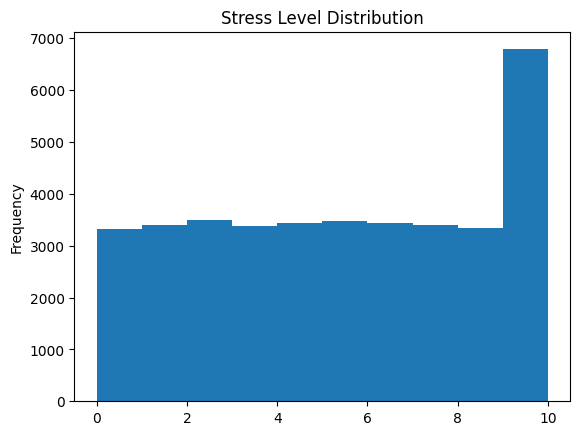

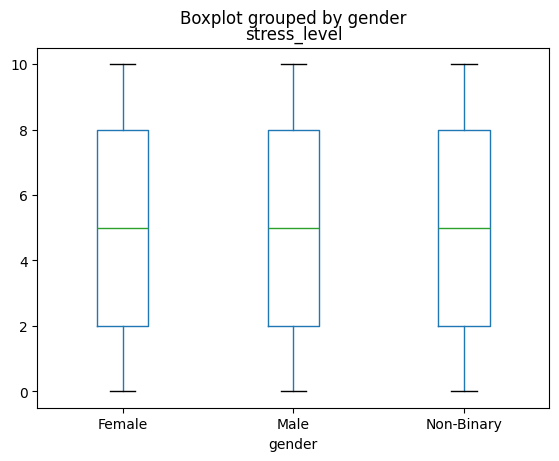

In [ ]:
# Histogram of Stress Level using pandas
data['stress_level'].plot(kind='hist', title='Stress Level Distribution', bins=10)

# Boxplot for Stress Level by Gender using pandas
data.boxplot(column='stress_level', by='gender', grid=False)


